In [2]:
!pip install yfinance ta --quiet

In [3]:

import pandas as pd
import numpy as np
import os
import warnings
import joblib
warnings.filterwarnings("ignore")

import yfinance as yf


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
bhavcopy_path = '/content/drive/MyDrive/nse bhavcopy (1).csv'

df_bhav = pd.read_csv(bhavcopy_path)

df_bhav.head()

,SYMBOL,NAME OF COMPANY,SERIES,DATE OF LISTING,PAID UP VALUE,MARKET LOT,ISIN NUMBER,FACE VALUE
0,20MICRONS,20 Microns Limited,EQ,06-OCT-2008,5,1,INE144J01027,5
1,21STCENMGM,21st Century Management Services Limited,BE,03-MAY-1995,10,1,INE253B01015,10
2,360ONE,360 ONE WAM LIMITED,EQ,19-SEP-2019,1,1,INE466L01038,1
3,3IINFOLTD,3i Infotech Limited,EQ,22-OCT-2021,10,1,INE748C01038,10
4,3MINDIA,3M India Limited,EQ,13-AUG-2004,10,1,INE470A01017,10


In [6]:
df_bhav.columns = df_bhav.columns.str.strip()

df_eq = df_bhav[df_bhav['SERIES'] == 'EQ']

symbols = df_eq['SYMBOL'].unique().tolist()
symbols = [symbol + ".NS" for symbol in symbols]

print("Total EQ stocks found:", len(symbols))
print("Example tickers:", symbols[:5])

Total EQ stocks found: 1797
Example tickers: ['20MICRONS.NS', '360ONE.NS', '3IINFOLTD.NS', '3MINDIA.NS', '5PAISA.NS']


In [7]:
import os
import time
import logging
from concurrent.futures import ThreadPoolExecutor, as_completed
import yfinance as yf

# Silence yfinance noise
logging.getLogger("yfinance").setLevel(logging.CRITICAL)

# Output folder in Drive
output_dir = "/content/drive/MyDrive/NSE_Stock_Data_New"
os.makedirs(output_dir, exist_ok=True)

START_DATE = "2010-01-01"
END_DATE = "2025-12-01"

def download_stock(symbol: str) -> str:
    try:
        filename = f"{symbol.replace('.NS', '')}_2010_2025.csv"
        filepath = os.path.join(output_dir, filename)

        if os.path.exists(filepath):
            return f"Already exists: {symbol}"

        # Single-ticker download
        data = yf.download(
            symbol,
            start=START_DATE,
            end=END_DATE,
            progress=False,
            auto_adjust=False,
            threads=False,   # important: don't double-thread
            interval="1d"
        )

        if data is None or data.empty:
            return f"No data: {symbol}"

        data.reset_index(inplace=True)
        data.to_csv(filepath, index=False)
        return f"Downloaded: {symbol} ({len(data)} rows)"

    except Exception as e:
        return f"Failed {symbol}: {e}"

# Try with fewer threads first
max_threads = 20  # start low, you can increase to 5 later

print("Starting multithreaded download...")

success = no_data = failed = 0

with ThreadPoolExecutor(max_workers=max_threads) as executor:
    futures = {executor.submit(download_stock, symbol): symbol for symbol in symbols}

    from tqdm.auto import tqdm
    for future in tqdm(as_completed(futures), total=len(futures), desc="Downloading"):
        result = future.result()
        print(result)

        if result.startswith("Downloaded"):
            success += 1
        elif result.startswith("No data"):
            no_data += 1
        elif result.startswith("Failed"):
            failed += 1



print("\nSummary:")
print("Downloaded:", success)
print("No data:", no_data)
print("Failed:", failed)
print("Total tried:", len(symbols))


Starting multithreaded download...


Downloading:   0%|          | 0/1797 [00:00<?, ?it/s]

Already exists: ADVANIHOTR.NS
Already exists: ASHOKA.NS
Already exists: AVROIND.NS
Already exists: BUTTERFLY.NS
Already exists: BANKINDIA.NS
Already exists: BHEL.NS
Already exists: ADSL.NS
Already exists: AKSHARCHEM.NS
Already exists: ASHIMASYN.NS
Already exists: ANUP.NS
Already exists: AVL.NS
Already exists: AEGISLOG.NS
Already exists: ANURAS.NS
Already exists: BANKBARODA.NS
Already exists: BHARTIHEXA.NS
Already exists: ADROITINFO.NS
Already exists: AKUMS.NS
Already exists: AKG.NS
Already exists: ASHIANA.NS
Already exists: ANUHPHR.NS
Already exists: AVANTIFEED.NS
Already exists: ABMINTLLTD.NS
Already exists: AARTISURF.NS
Already exists: BANKA.NS
Already exists: BHARTIARTL.NS
Already exists: ANTGRAPHIC.NS
Already exists: AKASH.NS
Already exists: ADANIENSOL.NS
Already exists: ASHAPURMIN.NS
Already exists: AFFORDABLE.NS
Already exists: AVANTEL.NS
Already exists: ADL.NS
Already exists: BANDHANBNK.NS
Already exists: BHARATWIRE.NS
Already exists: ACMESOLAR.NS
Already exists: AJOONI.NS
Alrea

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Already exists: MATRIMONY.NS
Already exists: MAXHEALTH.NS
Already exists: MAWANASUG.NS
Already exists: MAXESTATES.NS
Downloaded: HOVS.NS (3928 rows)
Already exists: MAYURUNIQ.NS
Already exists: MAZDOCK.NS
Already exists: MAXIND.NS
Already exists: MBAPL.NS
Already exists: MCLOUD.NS
Already exists: MEDIASSIST.NS
Already exists: MEDANTA.NS
Already exists: MEDICAMEQ.NS
Already exists: MBLINFRA.NS
Downloaded: IWEL.NS (3928 rows)
Already exists: MEDPLUS.NS
Already exists: MENONBE.NS
Already exists: MCX.NS
Already exists: MEDICO.NS
Already exists: MEGASTAR.NS
Already exists: MASTERTR.NS
Already exists: METROPOLIS.NS
Already exists: MHRIL.NS
Already exists: MFSL.NS
Already exists: MGEL.NS
Already exists: MIDHANI.NS
Already exists: MINDTECK.NS
Already exists: MGL.NS
No data: MANGCHEFER.NS
Already exists: MICEL.NS
Already exists: METROBRAND.NS
Downloaded: GRWRHITECH.NS (3928 rows)
Already exists: MMP.NS
Already exists: MIRCELECTR.NS
Already exists: MMFL.NS
Already exists: MMTC.NS
Already exists:

In [8]:
import os

folder = "/content/drive/MyDrive/NSE_Stock_Data"

# List only CSV files (each one is one stock)
csv_files = [f for f in os.listdir(folder) if f.endswith(".csv")]

print("Total shares downloaded:", len(csv_files))

Total shares downloaded: 1803


In [9]:
import os
import pandas as pd

# === Settings ===
data_dir = "/content/drive/MyDrive/NSE_Stock_Data_New"
output_path = os.path.join(data_dir, "top_250_by_value_with_penny.csv")

# Must-have stocks (blue chips + penny at the end)
# IMPORTANT: use symbols as they appear in filenames (no ".NS")
must_include = [
    "RELIANCE",
    "VOLTAS",
    "HDFCBANK",
    "INFY",
    "ICICIBANK",
    "ULTRACEMCO",
    "TATAMOTORS",
    "LT",
    "SBIN",
    "SUZLON",   # <-- penny stock at LAST position
]

stats = []

# === Step 1: Loop files and calculate TOTAL traded value per symbol ===
for fname in os.listdir(data_dir):
    # process only CSVs, skip any summary/top_250 files
    if not fname.endswith(".csv"):
        continue
    if "top_250" in fname:  # avoid re-reading your summary files
        continue

    file_path = os.path.join(data_dir, fname)

    try:
        # Use engine='python' and on_bad_lines='skip' to avoid tokenizing errors
        df = pd.read_csv(file_path, on_bad_lines="skip", engine="python")

        # Ensure we have needed columns
        if "Close" not in df.columns or "Volume" not in df.columns:
            # silently skip if structure is wrong
            continue

        # Convert to numeric & drop invalid rows
        df["Close"] = pd.to_numeric(df["Close"], errors="coerce")
        df["Volume"] = pd.to_numeric(df["Volume"], errors="coerce")
        df = df.dropna(subset=["Close", "Volume"])

        if df.empty:
            # silently skip empty after cleaning
            continue

        # Total traded value = sum(Close * Volume) across all rows
        total_value = (df["Close"] * df["Volume"]).sum()

        # Symbol from filename, e.g. 'RELIANCE_2010_2025.csv' -> 'RELIANCE'
        symbol = fname.split("_")[0]

        stats.append((symbol, total_value))

    except Exception:
        # Silently skip files that still cause issues
        continue

# === Step 2: Create DataFrame & sort by total traded value ===
value_df = pd.DataFrame(stats, columns=["Symbol", "TotalTradedValue"])
value_df = value_df.sort_values(
    by="TotalTradedValue", ascending=False
).reset_index(drop=True)

print("Total symbols with valid data:", len(value_df))

# === Step 3: Keep only must_include that actually exist in value_df ===
available_symbols = set(value_df["Symbol"].unique())
filtered_must_include = [s for s in must_include if s in available_symbols]

print("Must-include symbols found in data:", filtered_must_include)

# === Step 4: Build final top-250 list (must_include first) ===

# 4a – Pure top 250 by traded value
core_top_250 = value_df["Symbol"].head(250).tolist()

# 4b – Prepend must_include (blue chips + penny), avoid duplicates while keeping order
ordered_symbols = filtered_must_include + core_top_250

seen = set()
final_symbol_list = []
for sym in ordered_symbols:
    if sym not in seen:
        seen.add(sym)
        final_symbol_list.append(sym)

# Trim to exactly 250 (if you have at least 250 in universe)
final_symbol_list = final_symbol_list[:250]

print("Final symbol count:", len(final_symbol_list))

# === Step 5: Filter value_df to final symbols & keep the defined order ===
filtered_df = (
    value_df[value_df["Symbol"].isin(final_symbol_list)]
    .copy()
    .set_index("Symbol")
    .loc[final_symbol_list]   # preserve order: must_include first
    .reset_index()
)

filtered_df.to_csv(output_path, index=False)

print(f"Final Top 250 saved to: {output_path}")
print("Top 10 preview:", filtered_df["Symbol"].head(10).tolist())


Total symbols with valid data: 1777
Must-include symbols found in data: ['RELIANCE', 'VOLTAS', 'HDFCBANK', 'INFY', 'ICICIBANK', 'ULTRACEMCO', 'TATAMOTORS', 'LT', 'SBIN', 'SUZLON']
Final symbol count: 247
Final Top 250 saved to: /content/drive/MyDrive/NSE_Stock_Data_New/top_250_by_value_with_penny.csv
Top 10 preview: ['RELIANCE', 'VOLTAS', 'HDFCBANK', 'INFY', 'ICICIBANK', 'ULTRACEMCO', 'TATAMOTORS', 'LT', 'SBIN', 'SUZLON']


In [10]:
import os
import pandas as pd

# === Paths ===
data_dir = "/content/drive/MyDrive/NSE_Stock_Data_New"

# Use the correct top 250 file you created earlier
final_list_path = os.path.join(data_dir, "top_250_by_value_with_penny.csv")

# Load the final selected stocks (Top 250)
final_stocks_df = pd.read_csv(final_list_path)
selected_symbols = final_stocks_df["Symbol"].tolist()

print("Number of selected symbols:", len(selected_symbols))
print("First 10 symbols:", selected_symbols[:10])

merged_data = []  # to collect all cleaned dataframes

# === Loop through each selected stock and clean its data ===
for symbol in selected_symbols:
    # Your files look like: RELIANCE_2010_2025.csv, SBIN_2010_2025.csv, etc.
    filename = f"{symbol}_2010_2025.csv"
    file_path = os.path.join(data_dir, filename)

    if not os.path.exists(file_path):
        # File not found for this symbol – just skip
        # print(f"File not found for {symbol}")  # uncomment if you want to see missing
        continue

    try:
        # Read CSV (skip bad lines if any)
        df = pd.read_csv(file_path, on_bad_lines="skip", engine="python")

        # Make sure necessary columns are present
        required_cols = ["Date", "Open", "High", "Low", "Close", "Volume"]
        if not all(col in df.columns for col in required_cols):
            # print(f"Skipping {symbol}: missing some required columns")  # optional
            continue

        # Convert Date + price/volume columns to correct types
        df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
        for col in ["Open", "High", "Low", "Close", "Volume"]:
            df[col] = pd.to_numeric(df[col], errors="coerce")

        # Drop rows where Date or Close is missing
        df.dropna(subset=["Date", "Close"], inplace=True)

        if df.empty:
            # print(f"Skipping {symbol}: no valid rows after cleaning")  # optional
            continue

        # Add stock name column
        df["Stock"] = symbol

        # Keep only the columns we care about (optional but cleaner)
        df = df[["Date", "Open", "High", "Low", "Close", "Volume", "Stock"]]

        # Add to list
        merged_data.append(df)

    except Exception as e:
        # If something goes wrong with this stock, skip and continue
        # print(f"Skipping {symbol} due to error: {e}")  # optional
        continue

# === Combine into one big DataFrame ===
if merged_data:
    final_df = pd.concat(merged_data, ignore_index=True)
    output_path = os.path.join(data_dir, "merged_top250_clean.csv")
    final_df.to_csv(output_path, index=False)
    print(f"Merged dataset saved to: {output_path}")
    print("Shape of merged data (rows, columns):", final_df.shape)
    print(final_df.head())
else:
    print("No data merged. Check your paths, filenames, and top_250 file.")


Number of selected symbols: 250
First 10 symbols: ['RELIANCE', 'VOLTAS', 'HDFCBANK', 'INFY', 'ICICIBANK', 'ULTRACEMCO', 'TATAMOTORS', 'LT', 'SBIN', 'SUZLON']
Merged dataset saved to: /content/drive/MyDrive/NSE_Stock_Data_New/merged_top250_clean.csv
Shape of merged data (rows, columns): (878932, 7)
        Date        Open        High         Low       Close      Volume  \
0 2010-01-04  249.407104  249.407104  233.577728  245.841202  76646086.0   
1 2010-01-05  262.847809  262.847809  243.532516  244.744003  21392825.0   
2 2010-01-06  246.846970  250.184296  244.732574  248.698502  23691760.0   
3 2010-01-07  248.698502  254.870239  246.412659  252.824417  26197920.0   
4 2010-01-08  253.270157  254.595947  250.527161  252.161530  15110149.0   

      Stock  
0  RELIANCE  
1  RELIANCE  
2  RELIANCE  
3  RELIANCE  
4  RELIANCE  


In [11]:
import pandas as pd

# === Load merged dataset ===
file_path = "/content/drive/MyDrive/NSE_Stock_Data_New/merged_top250_clean.csv"
df = pd.read_csv(file_path)

# === Basic information ===
df_info = df.info()

# === Missing values summary ===
missing_summary = df.isnull().sum()

# === Preview top rows ===
df_preview = df.head()

# === Display outputs ===
df_info, missing_summary, df_preview


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878932 entries, 0 to 878931
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Date    878932 non-null  object 
 1   Open    878932 non-null  float64
 2   High    878932 non-null  float64
 3   Low     878932 non-null  float64
 4   Close   878932 non-null  float64
 5   Volume  878932 non-null  float64
 6   Stock   878932 non-null  object 
dtypes: float64(5), object(2)
memory usage: 46.9+ MB


(None,
 Date      0
 Open      0
 High      0
 Low       0
 Close     0
 Volume    0
 Stock     0
 dtype: int64,
          Date        Open        High         Low       Close      Volume  \
 0  2010-01-04  249.407104  249.407104  233.577728  245.841202  76646086.0   
 1  2010-01-05  262.847809  262.847809  243.532516  244.744003  21392825.0   
 2  2010-01-06  246.846970  250.184296  244.732574  248.698502  23691760.0   
 3  2010-01-07  248.698502  254.870239  246.412659  252.824417  26197920.0   
 4  2010-01-08  253.270157  254.595947  250.527161  252.161530  15110149.0   
 
       Stock  
 0  RELIANCE  
 1  RELIANCE  
 2  RELIANCE  
 3  RELIANCE  
 4  RELIANCE  )

In [12]:
import pandas as pd

# === Load merged dataset ===
merged_path = "/content/drive/MyDrive/NSE_Stock_Data_New/merged_top250_clean.csv"
df = pd.read_csv(merged_path)

# === Drop unwanted columns ending with ".1" ===
df = df.loc[:, ~df.columns.str.contains(r"\.1$")]

# === Convert Date to datetime ===
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# === Sort by Stock and Date ===
df = df.sort_values(by=["Stock", "Date"]).reset_index(drop=True)

# === Missing value summary ===
print("Missing values after cleaning:\n", df.isnull().sum())

# === Save final cleaned dataset ===
cleaned_path = "/content/drive/MyDrive/NSE_Stock_Data_New/top250_cleaned_final.csv"
df.to_csv(cleaned_path, index=False)

print("Cleaned dataset saved to:", cleaned_path)


Missing values after cleaning:
 Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Stock     0
dtype: int64
Cleaned dataset saved to: /content/drive/MyDrive/NSE_Stock_Data_New/top250_cleaned_final.csv


Rows for RELIANCE: 3928

Missing values for this stock:
 Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Stock     0
dtype: int64

Date range: 2010-01-04 00:00:00 to 2025-11-28 00:00:00

Preview:
              Date        Open        High         Low       Close      Volume  \
717352 2010-01-04  249.407104  249.407104  233.577728  245.841202  76646086.0   
717353 2010-01-05  262.847809  262.847809  243.532516  244.744003  21392825.0   
717354 2010-01-06  246.846970  250.184296  244.732574  248.698502  23691760.0   
717355 2010-01-07  248.698502  254.870239  246.412659  252.824417  26197920.0   
717356 2010-01-08  253.270157  254.595947  250.527161  252.161530  15110149.0   

           Stock  
717352  RELIANCE  
717353  RELIANCE  
717354  RELIANCE  
717355  RELIANCE  
717356  RELIANCE  


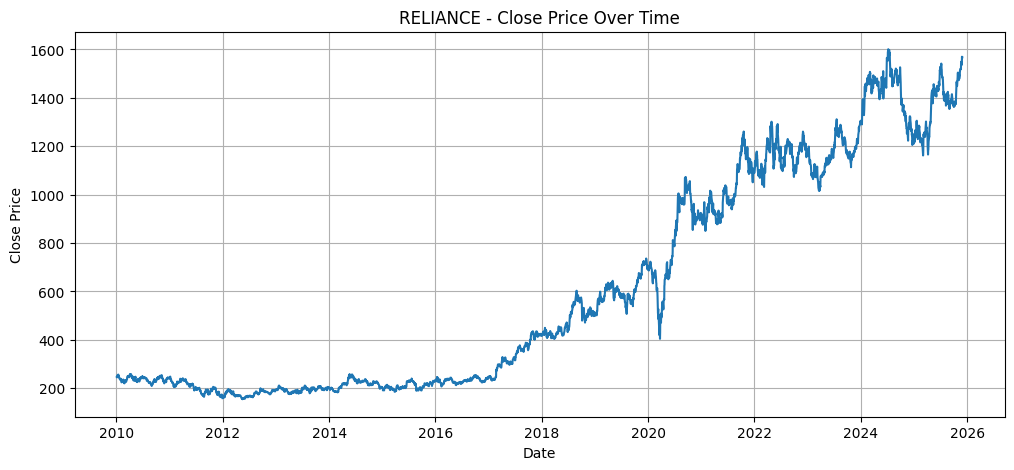

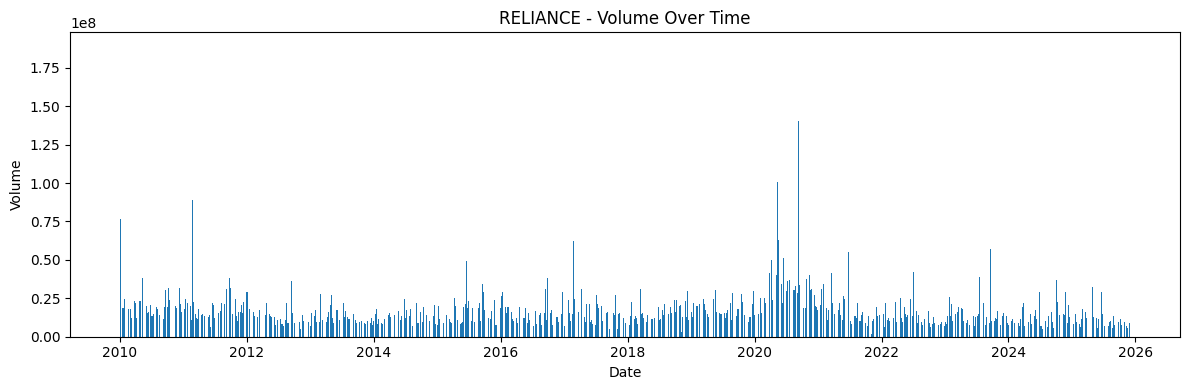

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load final cleaned dataset ===
cleaned_path = "/content/drive/MyDrive/NSE_Stock_Data_New/top250_cleaned_final.csv"
df = pd.read_csv(cleaned_path)

# Ensure Date is datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# === Choose a stock to inspect ===
# Use symbol exactly as in your CSVs / Symbol column (e.g. "RELIANCE", "SBIN", "VOLTAS", "SUZLON")
stock_to_check = "RELIANCE"

# Filter data for that stock
stock_df = df[df["Stock"] == stock_to_check].copy()

print(f"Rows for {stock_to_check}:", stock_df.shape[0])

# If no data, warn and stop
if stock_df.empty:
    print(f"No data found for {stock_to_check}. Check symbol name in 'Stock' column.")
else:
    # Sort by Date just to be safe
    stock_df = stock_df.sort_values("Date")

    # Quick sanity checks
    print("\nMissing values for this stock:\n", stock_df.isnull().sum())
    print("\nDate range:", stock_df["Date"].min(), "to", stock_df["Date"].max())
    print("\nPreview:\n", stock_df.head())

    # === Plot Close price over time ===
    plt.figure(figsize=(12, 5))
    plt.plot(stock_df["Date"], stock_df["Close"])
    plt.title(f"{stock_to_check} - Close Price Over Time")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.grid(True)
    plt.show()

    # === Optional: plot Volume as well ===
    plt.figure(figsize=(12, 4))
    plt.bar(stock_df["Date"], stock_df["Volume"])
    plt.title(f"{stock_to_check} - Volume Over Time")
    plt.xlabel("Date")
    plt.ylabel("Volume")
    plt.tight_layout()
    plt.show()


In [14]:
import pandas as pd
import ta

# === Load cleaned dataset ===
input_path = "/content/drive/MyDrive/NSE_Stock_Data_New/top250_cleaned_final.csv"
df = pd.read_csv(input_path)
df["Date"] = pd.to_datetime(df["Date"])

# === Container to hold indicator-processed stock data ===
enhanced_data = []

# === Process each stock separately ===
for stock in df["Stock"].unique():
    stock_df = df[df["Stock"] == stock].copy()
    stock_df = stock_df.sort_values("Date")

    # === Technical Indicators ===
    stock_df["SMA_14"] = ta.trend.sma_indicator(stock_df["Close"], window=14)
    stock_df["EMA_14"] = ta.trend.ema_indicator(stock_df["Close"], window=14)
    stock_df["RSI_14"] = ta.momentum.rsi(stock_df["Close"], window=14)

    stock_df["MACD"] = ta.trend.macd(stock_df["Close"])

    bb = ta.volatility.BollingerBands(
        close=stock_df["Close"],
        window=20,
        window_dev=2
    )
    stock_df["BB_High"] = bb.bollinger_hband()
    stock_df["BB_Low"] = bb.bollinger_lband()

    stock_df["ATR_14"] = ta.volatility.average_true_range(
        stock_df["High"], stock_df["Low"], stock_df["Close"], window=14
    )

    stock_df["Volume_SMA_14"] = ta.trend.sma_indicator(stock_df["Volume"], window=14)

    # Remove rows with NaN (created by rolling windows)
    stock_df.dropna(inplace=True)

    # Add to list
    enhanced_data.append(stock_df)

# === Combine all enhanced stocks ===
df_final = pd.concat(enhanced_data, ignore_index=True)

# === Save final dataset ===
output_path = "/content/drive/MyDrive/NSE_Stock_Data_New/top250_with_indicators.csv"
df_final.to_csv(output_path, index=False)

print("Technical indicators added and saved to:", output_path)
print("Final dataset shape:", df_final.shape)
df_final.head()

Technical indicators added and saved to: /content/drive/MyDrive/NSE_Stock_Data_New/top250_with_indicators.csv
Final dataset shape: (872807, 15)


,Date,Open,High,Low,Close,Volume,Stock,SMA_14,EMA_14,RSI_14,MACD,BB_High,BB_Low,ATR_14,Volume_SMA_14
0,2010-02-09,480.000000,486.600006,474.450012,483.500000,576433.0,ABREL,503.221429,501.600996,39.873934,-20.199314,602.821276,443.398722,26.071085,904070.142857
1,2010-02-10,485.200012,491.899994,470.100006,472.649994,817650.0,ABREL,496.949999,497.740863,37.533936,-20.696086,601.736153,437.523845,25.766007,919126.714286
2,2010-02-11,476.899994,487.500000,474.850006,479.850006,679900.0,ABREL,492.196426,495.355415,40.048232,-20.275082,597.428159,433.911840,24.986292,898722.000000
3,2010-02-15,479.850006,487.200012,474.450012,476.750000,382957.0,ABREL,487.475000,492.874693,39.314497,-19.961475,590.030144,431.779856,24.112271,865411.928571
4,2010-02-16,480.399994,498.500000,474.750000,496.500000,744868.0,ABREL,486.257143,493.358067,46.091007,-17.912791,577.349233,435.345765,24.086395,868383.785714


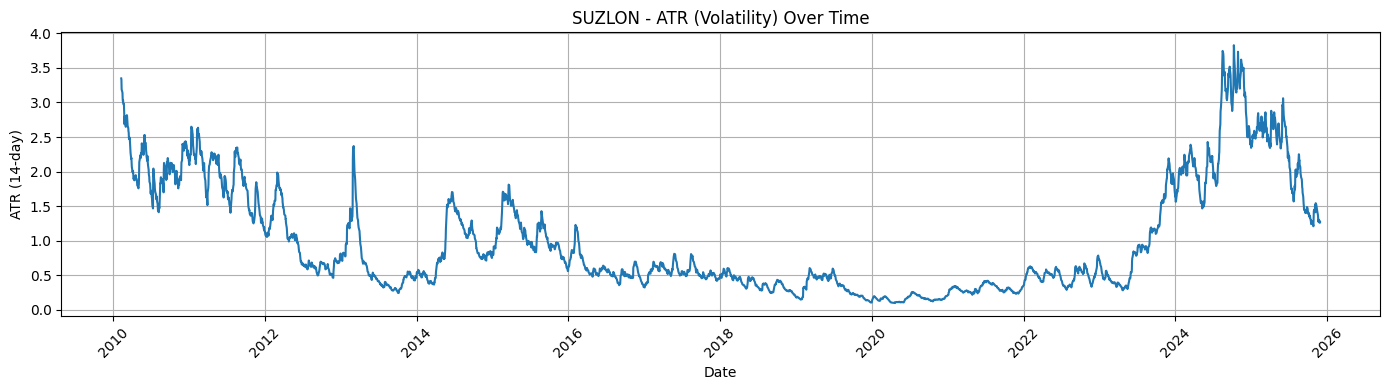

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# === Load dataset with indicators ===
df = pd.read_csv("/content/drive/MyDrive/NSE_Stock_Data_New/top250_with_indicators.csv")
df["Date"] = pd.to_datetime(df["Date"])

# === Choose a sample stock for validation ===
sample_stock = "SUZLON"
sample_df = df[df["Stock"] == sample_stock].sort_values("Date")

# === Plot ATR (volatility) ===
if "ATR_14" in sample_df.columns:
    plt.figure(figsize=(14, 4))
    sns.lineplot(data=sample_df, x="Date", y="ATR_14")
    plt.title(f"{sample_stock} - ATR (Volatility) Over Time")
    plt.xlabel("Date")
    plt.ylabel("ATR (14-day)")
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("ATR_14 indicator not found — check your indicator code.")


In [16]:
import pandas as pd

# === Load dataset with technical indicators ===
input_path = "/content/drive/MyDrive/NSE_Stock_Data_New/top250_with_indicators.csv"
df = pd.read_csv(input_path)
df["Date"] = pd.to_datetime(df["Date"])

# === Sort by Stock and Date (VERY IMPORTANT for time-series split) ===
df = df.sort_values(["Stock", "Date"]).reset_index(drop=True)

# Containers for final train & test sets
train_frames = []
test_frames = []

# === Split each stock individually ===
for stock in df["Stock"].unique():
    stock_df = df[df["Stock"] == stock]

    # Compute split index (80% train, 20% test)
    split_idx = int(len(stock_df) * 0.8)

    # 80% train
    train_frames.append(stock_df.iloc[:split_idx])

    # 20% test
    test_frames.append(stock_df.iloc[split_idx:])

# === Combine all stocks' train/test sets ===
train_df = pd.concat(train_frames, ignore_index=True)
test_df = pd.concat(test_frames, ignore_index=True)

# === Save output files ===
train_path = "/content/drive/MyDrive/NSE_Stock_Data_New/top250_train_80.csv"
test_path  = "/content/drive/MyDrive/NSE_Stock_Data_New/top250_test_20.csv"

train_df.to_csv(train_path, index=False)
test_df.to_csv(test_path, index=False)

print("Train/Test Split Completed!")
print("Train Shape:", train_df.shape)
print("Test Shape:", test_df.shape)
print("\nSaved files:")
print(train_path)
print(test_path)

Train/Test Split Completed!
Train Shape: (698147, 15)
Test Shape: (174660, 15)

Saved files:
/content/drive/MyDrive/NSE_Stock_Data_New/top250_train_80.csv
/content/drive/MyDrive/NSE_Stock_Data_New/top250_test_20.csv


XGBOOST

In [17]:
!pip install xgboost

RMSE: 5158.26
MAE: 585.95
R² Score: 0.8247


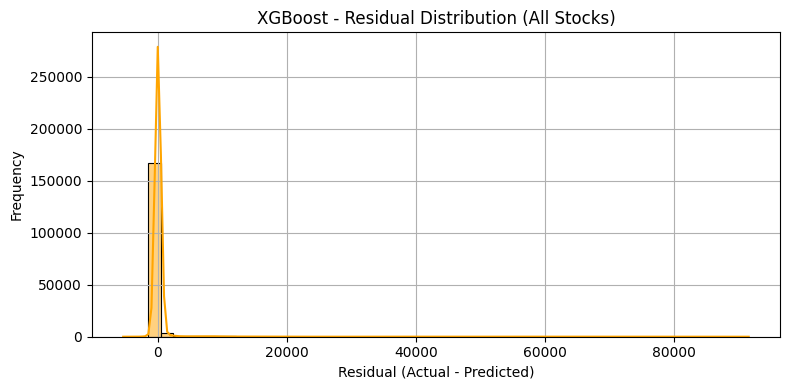

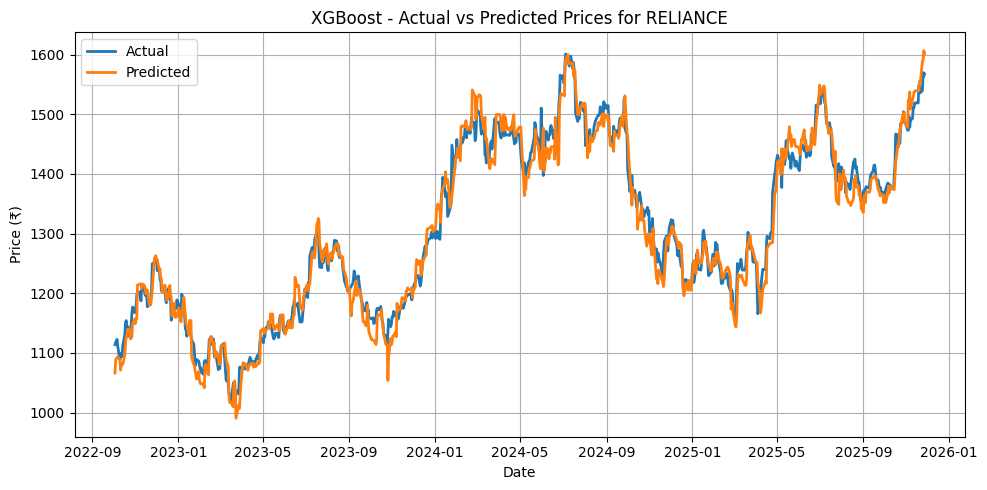

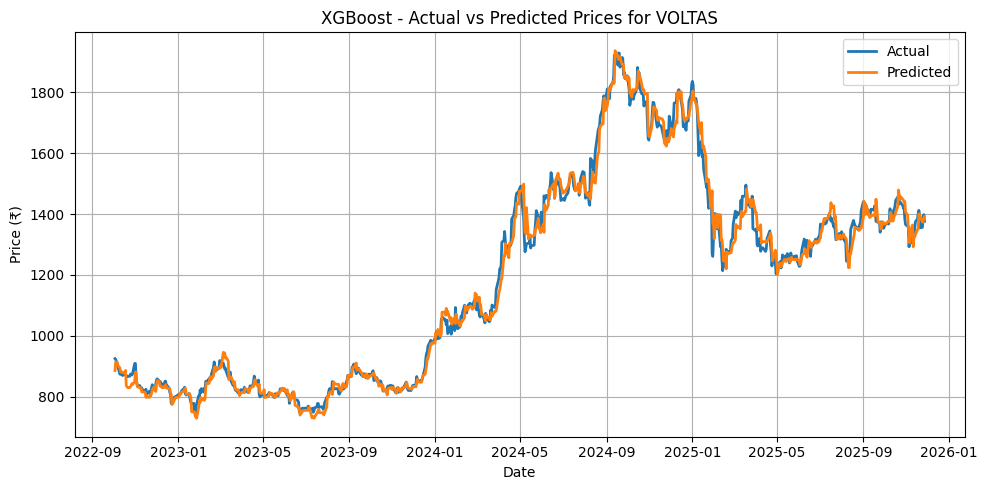

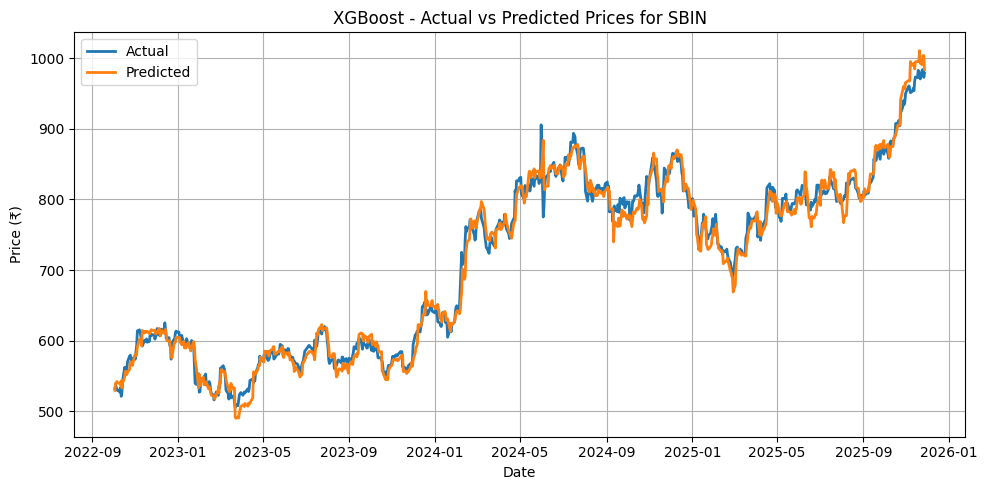

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load training and testing datasets
train_path = "/content/drive/MyDrive/NSE_Stock_Data_New/top250_train_80.csv"
test_path  = "/content/drive/MyDrive/NSE_Stock_Data_New/top250_test_20.csv"

train = pd.read_csv(train_path)
test  = pd.read_csv(test_path)

# Ensure 'Date' column is in datetime format
train["Date"] = pd.to_datetime(train["Date"])
test["Date"] = pd.to_datetime(test["Date"])

# Define features used for prediction
features = ["SMA_14", "EMA_14", "RSI_14", "MACD",
            "BB_High", "BB_Low", "ATR_14", "Volume_SMA_14"]

# Shift Close to get next-day target
train["Target"] = train.groupby("Stock")["Close"].shift(-1)
test["Target"] = test.groupby("Stock")["Close"].shift(-1)

# Drop rows with missing values
train.dropna(subset=features + ["Target"], inplace=True)
test.dropna(subset=features + ["Target"], inplace=True)

# Model training
X_train = train[features]
y_train = train["Target"]
X_test = test[features]
y_test = test["Target"]

model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predictions
preds = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.4f}")

# Save metrics for comparison
xgb_rmse = rmse
xgb_mae = mae
xgb_r2 = r2

# Residual distribution plot
residuals = y_test - preds
plt.figure(figsize=(8, 4))
sns.histplot(residuals, bins=50, kde=True, color='orange')
plt.title("XGBoost - Residual Distribution (All Stocks)")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# Function to plot per-stock predictions
def plot_stock_predictions(stock_symbol, model, test_df, feature_cols):
    stock_data = test_df[test_df["Stock"] == stock_symbol].copy()
    stock_data.dropna(subset=feature_cols + ["Target"], inplace=True)

    if stock_data.empty:
        print(f"No valid data found for {stock_symbol}")
        return

    dates = stock_data["Date"]
    actual = stock_data["Target"]
    predicted = model.predict(stock_data[feature_cols])

    plt.figure(figsize=(10, 5))
    plt.plot(dates, actual, label='Actual', linewidth=2)
    plt.plot(dates, predicted, label='Predicted', linewidth=2)
    plt.title(f"XGBoost - Actual vs Predicted Prices for {stock_symbol}")
    plt.xlabel("Date")
    plt.ylabel("Price (₹)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot predictions for selected stocks
plot_stock_predictions("RELIANCE", model, test, features)
plot_stock_predictions("VOLTAS", model, test, features)
plot_stock_predictions("SBIN", model, test, features)


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ========== 1. Load data ==========
train_path = "/content/drive/MyDrive/NSE_Stock_Data_New/top250_train_80.csv"
test_path  = "/content/drive/MyDrive/NSE_Stock_Data_New/top250_test_20.csv"

train = pd.read_csv(train_path)
test  = pd.read_csv(test_path)

# Ensure 'Date' is datetime
train["Date"] = pd.to_datetime(train["Date"])
test["Date"]  = pd.to_datetime(test["Date"])

# ========== 2. Features & target ==========
features = [
    "SMA_14", "EMA_14", "RSI_14", "MACD",
    "BB_High", "BB_Low", "ATR_14", "Volume_SMA_14"
]

# Next-day close as target
train["Target"] = train.groupby("Stock")["Close"].shift(-1)
test["Target"]  = test.groupby("Stock")["Close"].shift(-1)

# Drop rows with missing values in features or target
train.dropna(subset=features + ["Target"], inplace=True)
test.dropna(subset=features + ["Target"], inplace=True)

X_train, y_train = train[features], train["Target"]
X_test,  y_test  = test[features],  test["Target"]

# ========== 3. Train XGBoost model ==========
model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

model.fit(X_train, y_train)

# ========== 4. Global evaluation ==========
preds = model.predict(X_test)

mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)

print("=== XGBoost Overall Performance (All Stocks) ===")
print(f"RMSE : {rmse:.2f}")
print(f"MAE  : {mae:.2f}")
print(f"R²   : {r2:.4f}")

xgb_rmse = rmse
xgb_mae  = mae
xgb_r2   = r2


=== XGBoost Overall Performance (All Stocks) ===
RMSE : 5188.34
MAE  : 590.51
R²   : 0.8225


In [21]:
import os
import joblib
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ========== 1. Load training data ==========
train_path = "/content/drive/MyDrive/NSE_Stock_Data_New/top250_train_80.csv"
train = pd.read_csv(train_path)

# ========== 2. Define features and target ==========
features = [
    "SMA_14", "EMA_14", "RSI_14", "MACD",
    "BB_High", "BB_Low", "ATR_14", "Volume_SMA_14"
]

# Next-day Close as target
train["Target"] = train.groupby("Stock")["Close"].shift(-1)

# Drop rows with missing values in features or target
train.dropna(subset=features + ["Target"], inplace=True)

X_train = train[features]
y_train = train["Target"]

# ========== 3. Time-series cross-validation ==========
tscv = TimeSeriesSplit(n_splits=3)

# ========== 4. Hyperparameter search space for XGBoost ==========
param_dist = {
    "n_estimators": [100, 200],
    "max_depth": [3, 6, 10],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
}

# ========== 5. Model save path ==========
xgb_model_path = "/content/drive/MyDrive/NSE_Stock_Data_New/best_xgboost_model.pkl"

# ========== 6. Load existing model or run tuning ==========
if os.path.exists(xgb_model_path):
    best_xgb_model = joblib.load(xgb_model_path)
else:
    search_xgb = RandomizedSearchCV(
        estimator=XGBRegressor(n_jobs=-1, random_state=42),
        param_distributions=param_dist,
        n_iter=20,
        cv=tscv,
        verbose=2,
        scoring='neg_mean_squared_error',
        random_state=42
    )
    search_xgb.fit(X_train, y_train)
    best_xgb_model = search_xgb.best_estimator_
    joblib.dump(best_xgb_model, xgb_model_path)

print(f"Best XGBoost model saved to: {xgb_model_path}")

Best XGBoost model saved to: /content/drive/MyDrive/NSE_Stock_Data_New/best_xgboost_model.pkl



XGBoost Evaluation for RELIANCE (2022–2025)
---------------------------------------------
RMSE   : 52.73
MAE    : 44.46
R²     : 0.8631


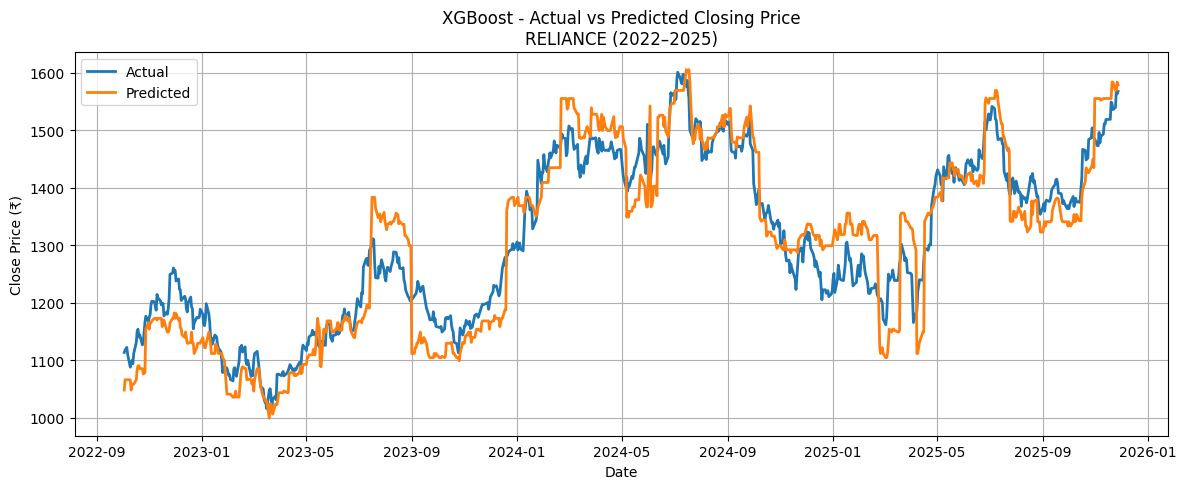


XGBoost Evaluation for VOLTAS (2022–2025)
---------------------------------------------
RMSE   : 54.33
MAE    : 41.23
R²     : 0.9737


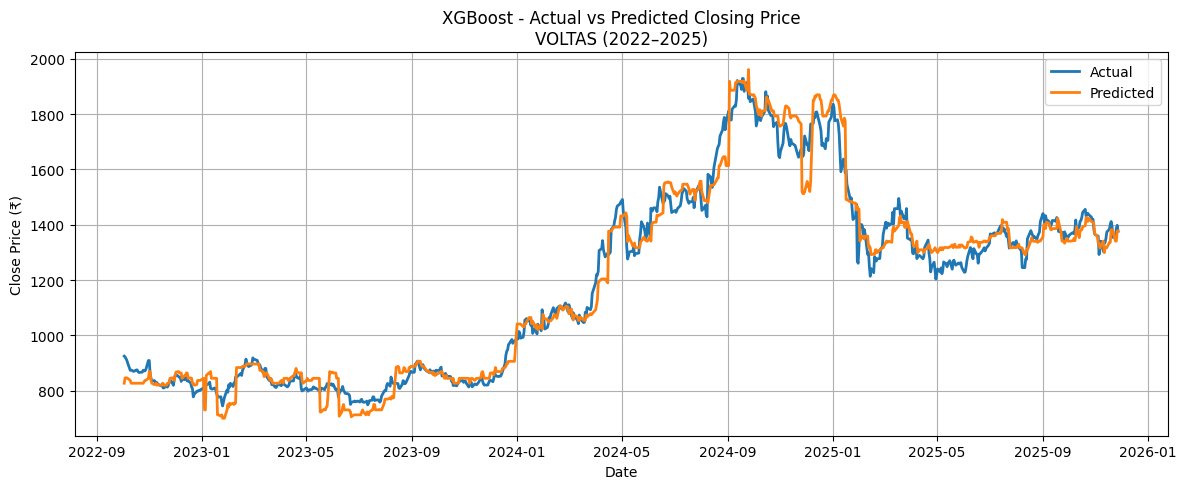


XGBoost Evaluation for SBIN (2022–2025)
---------------------------------------------
RMSE   : 32.57
MAE    : 24.99
R²     : 0.9294


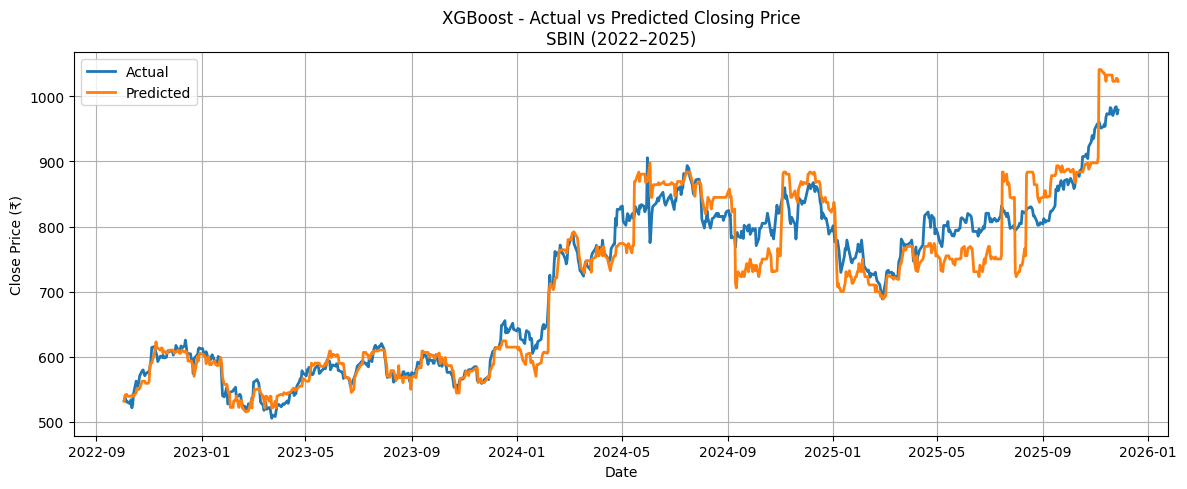


All XGBoost evaluation metrics saved to: /content/drive/MyDrive/NSE_Stock_Data_New/xgboost_stock_metrics.csv


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ========= 1. Load and prepare test data =========
# Corrected: Load the actual test set, not the training set
test_path = "/content/drive/MyDrive/NSE_Stock_Data_New/top250_test_20.csv"
test = pd.read_csv(test_path)

test["Date"] = pd.to_datetime(test["Date"])

features = [
    "SMA_14", "EMA_14", "RSI_14", "MACD",
    "BB_High", "BB_Low", "ATR_14", "Volume_SMA_14"
]

# Next-day close as target
test["Target"] = test.groupby("Stock")["Close"].shift(-1)

# Drop rows with missing feature/target values
test.dropna(subset=features + ["Target"], inplace=True)

# Restrict to desired date range
test = test[(test["Date"] >= "2022-10-03") & (test["Date"] <= "2025-12-01")]

# ========= 2. Load trained XGBoost model =========
# Corrected: Load the actual XGBoost model file, not the predictions CSV
model_path = "/content/drive/MyDrive/NSE_Stock_Data_New/best_xgboost_model.pkl"
xgb_model = joblib.load(model_path)

# ========= 3. Stocks to evaluate =========
# Corrected: Remove ".NS" suffix as per stock symbols in the data
selected_stocks = ["RELIANCE", "VOLTAS", "SBIN"]

# To store per-stock metrics
metrics_list = []

# ========= 4. Per-stock evaluation & plotting =========
for stock in selected_stocks:
    stock_df = test[test["Stock"] == stock].copy()

    if stock_df.empty:
        print(f"No data found for {stock}. Skipping...")
        continue

    X = stock_df[features]
    y_actual = stock_df["Target"]
    y_pred = xgb_model.predict(X)

    # Metrics
    mse = mean_squared_error(y_actual, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_actual, y_pred)
    r2 = r2_score(y_actual, y_pred)

    print(f"\nXGBoost Evaluation for {stock} (2022–2025)")
    print("-" * 45)
    print(f"RMSE   : {rmse:.2f}")
    print(f"MAE    : {mae:.2f}")
    print(f"R²     : {r2:.4f}")

    metrics_list.append({
        "Stock": stock,
        "Model": "XGBoost",
        "RMSE": round(rmse, 2),
        "MAE": round(mae, 2),
        "R2_Score": round(r2, 4),
    })

    # Plot Actual vs Predicted
    plt.figure(figsize=(12, 5))
    plt.plot(stock_df["Date"], y_actual, label="Actual", linewidth=2)
    plt.plot(stock_df["Date"], y_pred, label="Predicted", linewidth=2)
    plt.title(f"XGBoost - Actual vs Predicted Closing Price\n{stock} (2022–2025)")
    plt.xlabel("Date")
    plt.ylabel("Close Price (₹)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    plot_path = f"/content/drive/MyDrive/NSE_Stock_Data_New/xgb_predicted_vs_actual_{stock.replace('.NS', '')}.png"
    plt.savefig(plot_path)
    plt.show()

# ========= 5. Save metrics =========
metrics_df = pd.DataFrame(metrics_list)
metrics_csv_path = "/content/drive/MyDrive/NSE_Stock_Data_New/xgboost_stock_metrics.csv"
metrics_df.to_csv(metrics_csv_path, index=False)

print(f"\nAll XGBoost evaluation metrics saved to: {metrics_csv_path}")